In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:

beach_quality_df = pd.read_csv('Resources/Beach_Water_Quality.csv')
beach_quality_df.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,6/2/19 17:00,17.1,0.78,NaN,0.232,4.0,10.9,6/2/19 17:00,OhioStreetBeach201906021700
1,63rd Street Beach,9/18/13 10:00,18.9,7.56,1.517,0.140,4.0,11.0,9/18/13 10:00,63rdStreetBeach201309181000
2,63rd Street Beach,6/12/14 12:00,25.4,3.45,-0.072,0.031,9.0,12.2,6/12/14 12:00,63rdStreetBeach201406121200
3,63rd Street Beach,6/12/14 13:00,18.1,3.31,1.818,0.339,10.0,12.2,6/12/14 13:00,63rdStreetBeach201406121300
4,63rd Street Beach,6/12/14 14:00,17.5,2.93,1.545,0.136,4.0,12.2,6/12/14 14:00,63rdStreetBeach201406121400


In [3]:
beach_quality_df['Turbidity'].head()

0    0.78
1    7.56
2    3.45
3    3.31
4    2.93
Name: Turbidity, dtype: float64

In [4]:
beach_quality_df['Beach Name'].count()

39469

In [5]:
turbidity_means = beach_quality_df.groupby("Beach Name")["Turbidity"].mean()
turbidity_means

Beach Name
63rd Street Beach    4.313150
Calumet Beach        1.886594
Montrose Beach       2.898791
Ohio Street Beach    5.951276
Osterman Beach       8.707598
Rainbow Beach        3.164116
Name: Turbidity, dtype: float64

In [6]:
beach_quality_df.shape

(39469, 10)

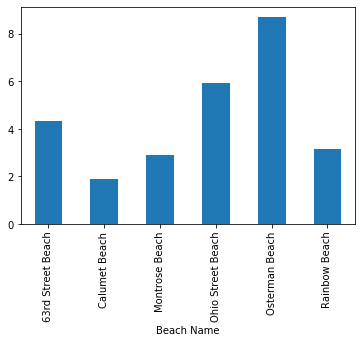

In [8]:
x = turbidity_means.plot.bar()

In [9]:
selected_beach_quality_df = beach_quality_df[['Beach Name','Measurement Timestamp','Water Temperature','Turbidity','Wave Height', 'Wave Period']].copy()
selected_beach_quality_df.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period
0,Ohio Street Beach,6/2/19 17:00,17.1,0.78,0.232,4.0
1,63rd Street Beach,9/18/13 10:00,18.9,7.56,0.140,4.0
2,63rd Street Beach,6/12/14 12:00,25.4,3.45,0.031,9.0
3,63rd Street Beach,6/12/14 13:00,18.1,3.31,0.339,10.0
4,63rd Street Beach,6/12/14 14:00,17.5,2.93,0.136,4.0


In [10]:
result_turbidity_df = selected_beach_quality_df[['Beach Name', 'Measurement Timestamp', "Turbidity"]].copy().sort_values("Beach Name")

In [11]:
result_turbidity_df

,Beach Name,Measurement Timestamp,Turbidity
2655,63rd Street Beach,8/5/15 14:00,0.52
2275,63rd Street Beach,7/17/15 2:00,3.07
2276,63rd Street Beach,7/17/15 4:00,3.61
2277,63rd Street Beach,7/17/15 5:00,3.76
2278,63rd Street Beach,7/17/15 6:00,3.95
...,...,...,...
33815,Rainbow Beach,8/8/15 10:00,0.57
33814,Rainbow Beach,8/8/15 9:00,0.60
33813,Rainbow Beach,8/8/15 8:00,0.60
33823,Rainbow Beach,8/8/15 18:00,3.68


In [12]:
result_turbidity_df["Date"] = pd.to_datetime(result_turbidity_df["Measurement Timestamp"]).dt.date
result_turbidity_df

,Beach Name,Measurement Timestamp,Turbidity,Date
2655,63rd Street Beach,8/5/15 14:00,0.52,2015-08-05
2275,63rd Street Beach,7/17/15 2:00,3.07,2015-07-17
2276,63rd Street Beach,7/17/15 4:00,3.61,2015-07-17
2277,63rd Street Beach,7/17/15 5:00,3.76,2015-07-17
2278,63rd Street Beach,7/17/15 6:00,3.95,2015-07-17
...,...,...,...,...
33815,Rainbow Beach,8/8/15 10:00,0.57,2015-08-08
33814,Rainbow Beach,8/8/15 9:00,0.60,2015-08-08
33813,Rainbow Beach,8/8/15 8:00,0.60,2015-08-08
33823,Rainbow Beach,8/8/15 18:00,3.68,2015-08-08


In [13]:
result_turbidity_df['Date']= pd.to_datetime(result_turbidity_df['Date']) 

In [15]:
result_turbidity_df.info()
result_turbidity_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39469 entries, 2655 to 39468
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Beach Name             39469 non-null  object        
 1   Measurement Timestamp  39469 non-null  object        
 2   Turbidity              39469 non-null  float64       
 3   Date                   39469 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.5+ MB


,Beach Name,Measurement Timestamp,Turbidity,Date
2655,63rd Street Beach,8/5/15 14:00,0.52,2015-08-05
2275,63rd Street Beach,7/17/15 2:00,3.07,2015-07-17
2276,63rd Street Beach,7/17/15 4:00,3.61,2015-07-17
2277,63rd Street Beach,7/17/15 5:00,3.76,2015-07-17
2278,63rd Street Beach,7/17/15 6:00,3.95,2015-07-17
...,...,...,...,...
33815,Rainbow Beach,8/8/15 10:00,0.57,2015-08-08
33814,Rainbow Beach,8/8/15 9:00,0.60,2015-08-08
33813,Rainbow Beach,8/8/15 8:00,0.60,2015-08-08
33823,Rainbow Beach,8/8/15 18:00,3.68,2015-08-08


In [16]:
result_turbidity_2014_df = result_turbidity_df[(result_turbidity_df['Date'] > '12/31/2013') & (result_turbidity_df['Date'] < '01/01/2015')]
result_turbidity_2015_df = result_turbidity_df[(result_turbidity_df['Date'] > '12/31/2014') & (result_turbidity_df['Date'] < '01/01/2016')]
result_turbidity_2016_df = result_turbidity_df[(result_turbidity_df['Date'] > '12/31/2015') & (result_turbidity_df['Date'] < '01/01/2017')]
result_turbidity_2017_df = result_turbidity_df[(result_turbidity_df['Date'] > '12/31/2016') & (result_turbidity_df['Date'] < '01/01/2018')]
result_turbidity_2018_df = result_turbidity_df[(result_turbidity_df['Date'] > '12/31/2017') & (result_turbidity_df['Date'] < '01/01/2019')]
result_turbidity_2019_df = result_turbidity_df[(result_turbidity_df['Date'] > '12/31/2018') & (result_turbidity_df['Date'] < '01/01/2020')]

In [17]:
result_turbidity_2014_df

,Beach Name,Measurement Timestamp,Turbidity,Date
563,63rd Street Beach,7/6/14 10:00,0.47,2014-07-06
564,63rd Street Beach,7/6/14 11:00,0.45,2014-07-06
565,63rd Street Beach,7/6/14 12:00,0.66,2014-07-06
566,63rd Street Beach,7/6/14 13:00,0.87,2014-07-06
567,63rd Street Beach,7/6/14 14:00,0.62,2014-07-06
...,...,...,...,...
32167,Rainbow Beach,7/7/14 8:00,0.88,2014-07-07
32166,Rainbow Beach,7/7/14 7:00,0.90,2014-07-07
32165,Rainbow Beach,7/7/14 6:00,0.94,2014-07-07
32164,Rainbow Beach,7/7/14 5:00,0.72,2014-07-07


In [18]:
result_turbidity_2015_df

,Beach Name,Measurement Timestamp,Turbidity,Date
2655,63rd Street Beach,8/5/15 14:00,0.52,2015-08-05
2275,63rd Street Beach,7/17/15 2:00,3.07,2015-07-17
2276,63rd Street Beach,7/17/15 4:00,3.61,2015-07-17
2277,63rd Street Beach,7/17/15 5:00,3.76,2015-07-17
2278,63rd Street Beach,7/17/15 6:00,3.95,2015-07-17
...,...,...,...,...
33815,Rainbow Beach,8/8/15 10:00,0.57,2015-08-08
33814,Rainbow Beach,8/8/15 9:00,0.60,2015-08-08
33813,Rainbow Beach,8/8/15 8:00,0.60,2015-08-08
33823,Rainbow Beach,8/8/15 18:00,3.68,2015-08-08


In [19]:
mu_turbidity_2014_df = result_turbidity_2014_df.groupby("Beach Name")["Turbidity"].mean()
mu_turbidity_2015_df = result_turbidity_2015_df.groupby("Beach Name")["Turbidity"].mean()
mu_turbidity_2016_df = result_turbidity_2016_df.groupby("Beach Name")["Turbidity"].mean()
mu_turbidity_2017_df = result_turbidity_2017_df.groupby("Beach Name")["Turbidity"].mean()
mu_turbidity_2018_df = result_turbidity_2018_df.groupby("Beach Name")["Turbidity"].mean()
mu_turbidity_2019_df = result_turbidity_2019_df.groupby("Beach Name")["Turbidity"].mean()

In [20]:
mu_turbidity_2014_df

Beach Name
63rd Street Beach     7.628707
Calumet Beach         1.529727
Montrose Beach        4.332926
Ohio Street Beach    27.272717
Osterman Beach        4.127782
Rainbow Beach         1.097441
Name: Turbidity, dtype: float64

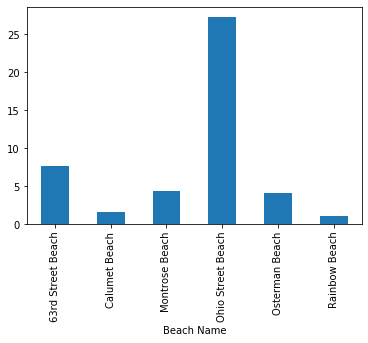

In [21]:
x = mu_turbidity_2014_df.plot.bar()

In [24]:
mu_turbidity_2015_df

Beach Name
63rd Street Beach     2.608415
Calumet Beach         2.087182
Montrose Beach        3.929488
Ohio Street Beach     1.977578
Osterman Beach       12.451613
Rainbow Beach         3.980990
Name: Turbidity, dtype: float64

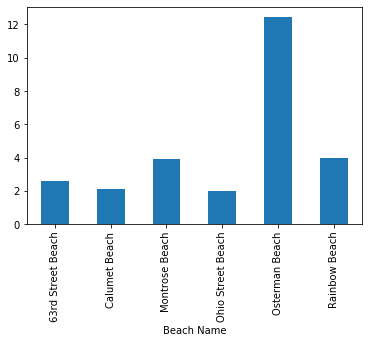

In [25]:
x = mu_turbidity_2015_df.plot.bar()

In [26]:
mu_turbidity_2016_df

Beach Name
Calumet Beach        1.950306
Montrose Beach       0.606981
Ohio Street Beach    2.859882
Name: Turbidity, dtype: float64

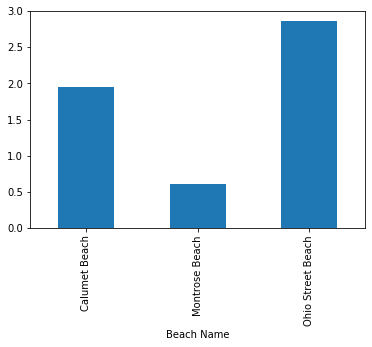

In [27]:
x = mu_turbidity_2016_df.plot.bar()

In [28]:
mu_turbidity_2017_df

Beach Name
Ohio Street Beach    2.508552
Name: Turbidity, dtype: float64

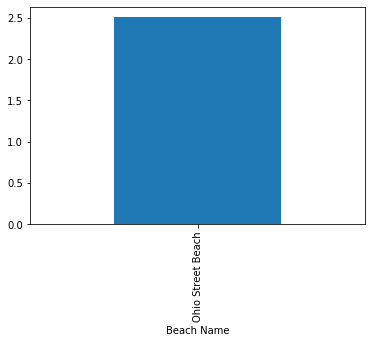

In [31]:
x = mu_turbidity_2017_df.plot.bar()

In [32]:
mu_turbidity_2018_df

Beach Name
Calumet Beach        3.150000
Ohio Street Beach    1.798583
Name: Turbidity, dtype: float64

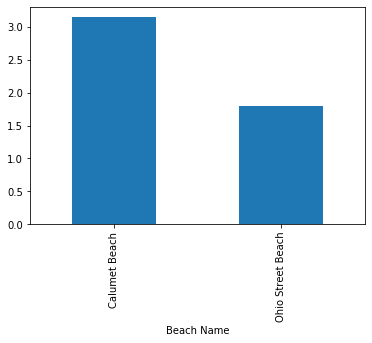

In [33]:
x = mu_turbidity_2018_df.plot.bar()

In [34]:
mu_turbidity_2019_df

Beach Name
Ohio Street Beach    2.42035
Name: Turbidity, dtype: float64

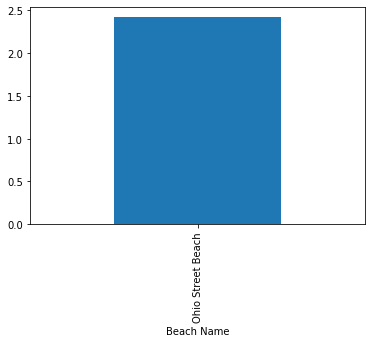

In [35]:
x = mu_turbidity_2019_df.plot.bar()

In [ ]:
temperature = beach_quality_df.groupby("Beach Name")["Water Temperature"].mean()
temperature

In [ ]:
xtemps = temperature.plot.bar()

In [ ]:
beach_quality_df.isnull().sum()

In [ ]:
beach_quality_df[beach_quality_df.Turbidity.isnull()]

In [ ]:
temperature = beach_quality_df.groupby("Beach Name")["Water Temperature"].mean()
temperature

In [ ]:
waves = beach_quality_df.groupby("Beach Name")["Wave Height"].mean()
waves

In [ ]:
xwaves = waves.plot.bar()

In [ ]:
beach_quality_df.dropna(subset= ['Wave Height']).shape

In [ ]:
waves.replace('', np.NaN)

In [ ]:
beach_quality_df.columns = [c.replace(' ', '_') for c in beach_quality_df.columns]

In [ ]:
beach_quality_df.columns

In [ ]:
beach_quality_df[beach_quality_df.Wave_Height<0]

In [ ]:
negatives = beach_quality_df[beach_quality_df['Wave_Height'] < 0]
negatives

In [ ]:
newdf=beach_quality_df[beach_quality_df.Wave_Height > 0]
newdf

In [ ]:
Wave_Height = newdf.groupby("Beach_Name")["Wave_Height"].mean()
Wave_Height

In [ ]:
xwaves = Wave_Height.plot.bar()

In [ ]:
beach_advisory_df = pd.read_csv('Resources/Beach_Swim_Advisories.csv')
beach_advisory_df.head()

In [ ]:
beach_advisory_df.shape

In [ ]:
selected_beach_advisory_df = beach_advisory_df[['Beach Name','Predicted Level', 'Swim Advisory']].copy()
selected_beach_advisory_df.head()

In [ ]:
selected_beach_advisory_df.groupby(['Beach Name','Swim Advisory']).count()
df1 = selected_beach_advisory_df.groupby(['Beach Name','Swim Advisory']).count()

In [ ]:
beach_weather_df = pd.read_csv('Resources/Beach_Weather_Stations.csv')
beach_weather_df.head()

In [ ]:
beach_weather_df.shape

In [ ]:
selected_beach_weather_df = beach_weather_df[['Station Name','Rain Intensity', 'Wind Speed']].copy()
selected_beach_weather_df.head()

In [ ]:
beach_E_coli_df = pd.read_csv('Resources/Beach_E_Coli_Predictions.csv')
beach_E_coli_df.head()

In [ ]:
selected_beach_E_coli_df = beach_E_coli_df[['Beach Name','Date', 'Predicted Level','Latitude','Longitude','Location']].copy()
selected_beach_E_coli_df.head()